<a href="https://colab.research.google.com/github/OfriA/AppliedProject52056/blob/main/data/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import pandas as pd


path = '/content/drive/MyDrive/AppliedProject/data/ER_data.xlsx'
data = pd.read_excel(path)
data.head()


In [47]:
print(data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       'pba17', 'pba18', 'pba19', 'pba20', 'pba21', 'pba22', 'pba23',
       'publication', 'publication_1_TEXT', 'notes'],
      dtype='object', length=344)


<Axes: >

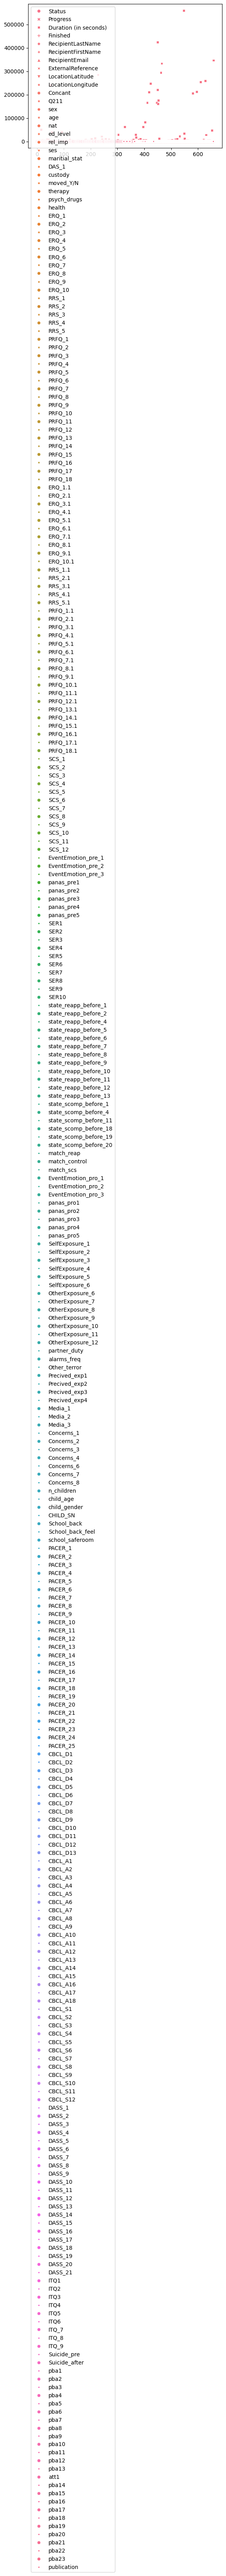

In [50]:
import seaborn as sns


sns.scatterplot(data=data)
#sns.histplot(data['column_name'])